In [1]:
# Dependencias
import pandas as pd
import numpy as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
from   scipy import stats

In [2]:
# Cargue de los datos | informacion
df = pd.read_excel("../Archivos Generados/DatasetFinal.xlsx")

In [3]:
df.head(5)

,ID_LOTE,TIPO_SIEMBRA,SEM_TRATADAS,MATERIAL_GENETICO,CULT_ANT,DRENAJE,METODO_COSECHA,ALMACENAMIENTO_FINCA,DIAS_EN_EMERGER,DIAS_EN_EMERGER_A_FLORECER,...,Temp_Max_Avg_Mad,Temp_Min_Avg_Mad,Temp_Avg_Mad,Diurnal_Range_Avg_Mad,Sol_Ener_Accu_Mad,Temp_Max_34_Freq_Mad,Rain_Accu_Mad,Rain_10_Freq_Mad,Rhum_Avg_Mad,RDT_AJUSTADO
0,40,Mecanizado,NO,PIONEER 30F32,Algodon,SI,Manual,NO,5,63,...,32.05,23.60,27.83,8.45,13197.57,0.05,279.3,0.23,82.41,4767.44
1,43,Mecanizado,SI,DK 234,Maiz,SI,Manual,NO,5,64,...,32.37,23.49,27.93,8.89,12436.49,0.03,221.2,0.26,81.86,4651.16
2,44,Mecanizado,NO,PIONEER 30F32,Algodon,SI,Manual,NO,5,59,...,32.17,23.53,27.85,8.63,11267.17,0.03,226.0,0.27,82.61,5180.23
3,45,Mecanizado,NO,Otro,Algodon,SI,Manual,NO,5,64,...,32.19,23.54,27.86,8.65,11066.68,0.03,223.2,0.29,81.84,4897.67
4,46,Mecanizado,NO,Otro,Algodon,SI,Manual,NO,5,63,...,32.19,23.54,27.86,8.65,11066.68,0.03,223.2,0.29,81.84,5302.33


In [4]:
# Tipos de datos del datset
# Variables categoricas Ordinales | nominales | binarias codificacion
print(df.dtypes)

ID_LOTE                   int64
TIPO_SIEMBRA             object
SEM_TRATADAS             object
MATERIAL_GENETICO        object
CULT_ANT                 object
                         ...   
Temp_Max_34_Freq_Mad    float64
Rain_Accu_Mad           float64
Rain_10_Freq_Mad        float64
Rhum_Avg_Mad            float64
RDT_AJUSTADO            float64
Length: 116, dtype: object


<AxesSubplot:>

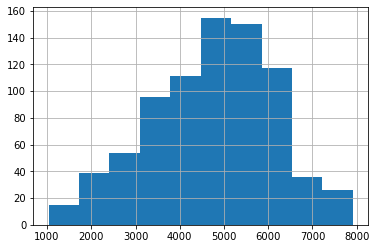

In [14]:
df.RDT_AJUSTADO.hist()

## Analisis Exploratorio de los datos

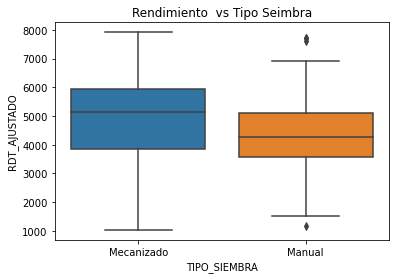

In [5]:
# Como es el rendimiento del cultivo | teniendo en cuenta difentes caracteritcas (categoricas)
sns.boxplot(x='TIPO_SIEMBRA', y = 'RDT_AJUSTADO', data = df) 
plt.title("Rendimiento  vs Tipo Seimbra");

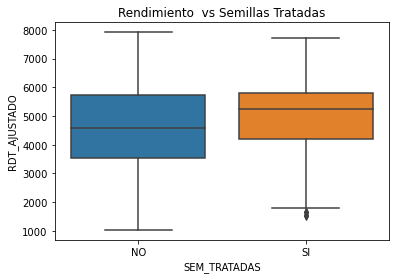

In [6]:
sns.boxplot(x='SEM_TRATADAS', y = 'RDT_AJUSTADO', data = df) 
plt.title("Rendimiento  vs Semillas Tratadas");

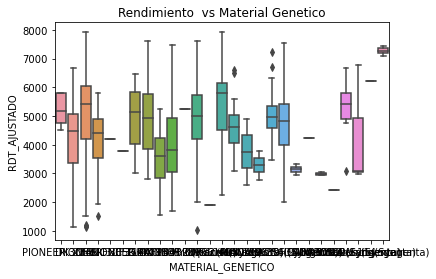

In [7]:
sns.boxplot(x='MATERIAL_GENETICO', y = 'RDT_AJUSTADO', data = df) 
plt.title("Rendimiento  vs Material Genetico");

**Conclusion**: La mediana para el tipo de siembra Mecanizado, parece ser mas alta que para el tipo de siembra manual, ademas , en la categoria manual existen algunos valores atipicos.

In [8]:
# Se realizan algunas pruebas t para saber si hay diferencia estadisticamente significativa entre
# Las principales variables categoricas y el rendimiento del cultivo
## Una prueba t-test simple para diferencia de medias
t2, p2 = stats.ttest_ind(df.loc[df['TIPO_SIEMBRA'] == 'Mecanizado', 'RDT_AJUSTADO'],df.loc[df['TIPO_SIEMBRA'] == 'Manual', 'RDT_AJUSTADO'])
print("t = " + str(t2))
print("p = " + str(p2))

t = 5.912725224366348
p = 4.988552093411794e-09


**Observacion** Si hay una diferencias estadisticamente significativa ente TIPO_SIEMBRA y RENDIMEINTO del cultivo p < 0.05

## Correlaciones
La correlación mide la relación lineal entre dos variables, si la correlacion resultante es 0 significa que las 2 variables no tiene ningun tipo de relacion lineal, pero puede tener otro tipo de relacion . La correlacion solo captura relaciones lineal, para capturar otro tipo de relaciones se requieren metodos mas  avanzados

In [9]:
# Se obtienen todas la variables numericas del datset
numerical_features = df.select_dtypes(include = ["float64","int64"]).columns
print("Cantidad del variables numericas: ", len(numerical_features))
numerical_features

Cantidad del variables numericas:  86


Index(['ID_LOTE', 'DIAS_EN_EMERGER', 'DIAS_EN_EMERGER_A_FLORECER',
       'DIAS_EN_FLORECER_A_COSECHAR', 'POBLACION_20DIAS_AJT', 'ALTURA_LOT',
       'ContEnfQui_Emer_Flor', 'ContEnfQui_Flor_Cose', 'ContMalMec_Siem_Emer',
       'ContMalMec_Emer_Flor', 'ContMalMec_Flor_Cose', 'ContMalQui_Antes_Siem',
       'ContMalQui_Siem_Emer', 'ContMalQui_Emer_Flor', 'ContMalQui_Flor_Cose',
       'ContPlaQui_Antes_Siem', 'ContPlaQui_Siem_Emer', 'ContPlaQui_Emer_Flor',
       'ContPlaQui_Flor_Cose', 'TotN_Antes_Siem', 'TotN_Siem_Emer',
       'TotN_Emer_Flor', 'TotP_Antes_Siem', 'TotP_Siem_Emer', 'TotP_Emer_Flor',
       'TotK_Antes_Siem', 'TotK_Siem_Emer', 'TotK_Emer_Flor',
       'FerOrg_Emer_Flor', 'FerQui_Antes_Siem', 'FerQui_Siem_Emer',
       'FerQui_Emer_Flor', 'PENDIENTE_RASTA', 'NO_CAPAS_RASTA', 'PH_RASTA',
       'PROFUND_CAP_ENDURE_RASTA', 'ESPESOR_CAP_ENDURE_RASTA',
       'PROFUND_MOTEADOS_RASTA', 'PROFUND_RAICES_VIVAS_RASTA', 'prof_efectiva',
       'Porc_A', 'Porc_Ar', 'Porc_ArA', 'P

In [10]:
# Se calcula la matriz de correlacion
mat_corr = df[numerical_features].corr()

In [11]:
# Se gurda la matriz de correlacion en un excel para posteriores analisis
mat_corr.to_excel("../Archivos Generados/matriz_correlacion.xlsx")

Text(0.5, 1.0, 'Matriz de correlación')

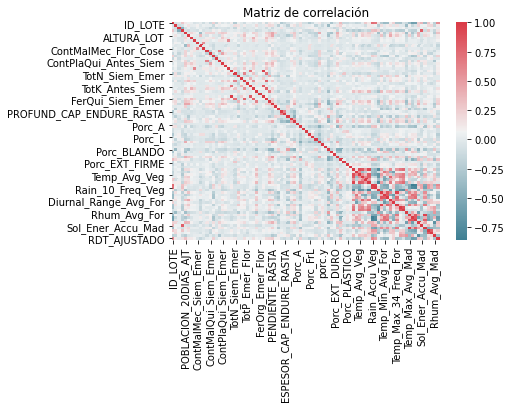

In [12]:
# Diagram de calor
sns.heatmap(mat_corr,cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title("Matriz de correlación")

### REFERENCIAS
-  https://datavizcatalogue.com/ES/metodos/diagrama_cajas_y_bigotes.html
